In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
# Step 1: Load and prepare the dataset
# Define image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

In [17]:
# Directory paths for dataset (Assuming 'horses' and 'humans' directories exist)
data_dir = r"C:\Users\B Vasundhara\Downloads\Mid-model Exam\Mid-model Exam\horse-or-human\horse-or-human"

# Create train and validation generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


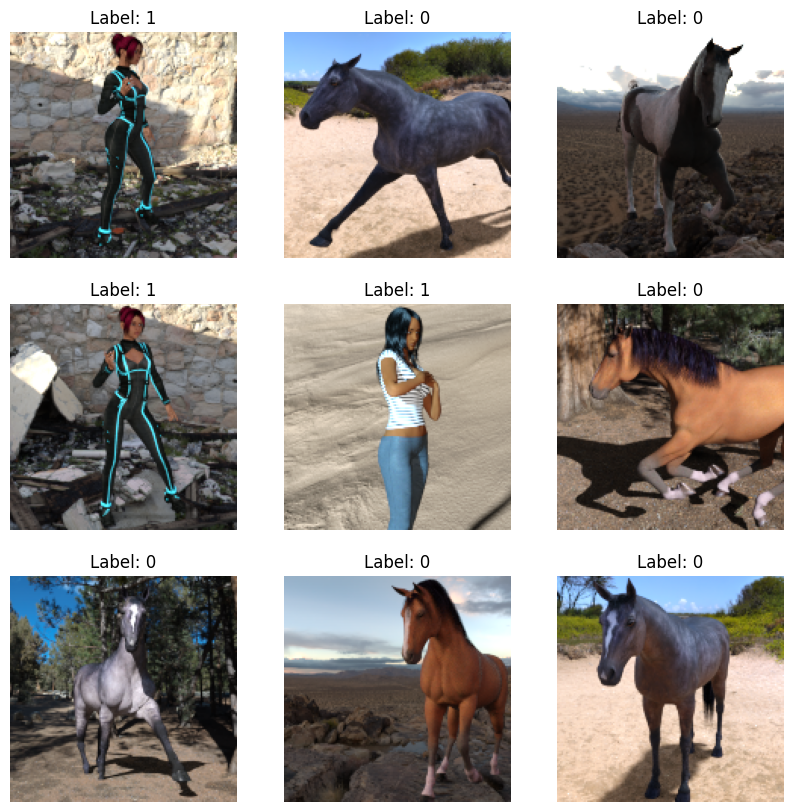

In [18]:
# Step 2: Visualize some samples
def visualize_samples(data_gen):
    images, labels = next(data_gen)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title("Label: " + str(int(labels[i])))
        plt.axis("off")
    plt.show()

visualize_samples(train_generator)

In [19]:
# Step 3: Build CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

model = build_model()

In [20]:
# Step 4: Compile the model
learning_rate = 0.001
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

In [21]:
# Step 5: Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

Epoch 1/5
26/26 [==============================] - 38s 1s/step - loss: 0.5453 - accuracy: 0.6849 - val_loss: 0.1664 - val_accuracy: 0.9463
Epoch 2/5
26/26 [==============================] - 17s 655ms/step - loss: 0.1437 - accuracy: 0.9380 - val_loss: 0.1382 - val_accuracy: 0.9463
Epoch 3/5
26/26 [==============================] - 17s 650ms/step - loss: 0.0781 - accuracy: 0.9720 - val_loss: 0.0430 - val_accuracy: 0.9854
Epoch 4/5
26/26 [==============================] - 17s 650ms/step - loss: 0.0665 - accuracy: 0.9757 - val_loss: 0.2682 - val_accuracy: 0.8878
Epoch 5/5
26/26 [==============================] - 17s 650ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.1657 - val_accuracy: 0.9171


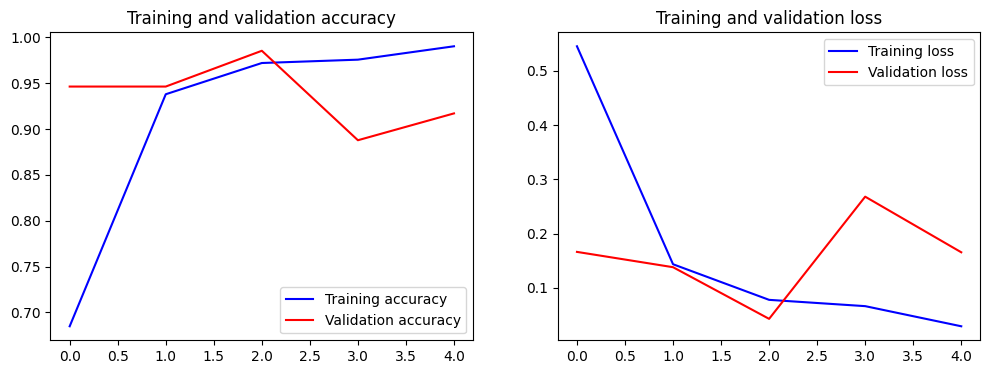

In [22]:
# Step 6: Plot training and validation loss/accuracy
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_history(history)

In [23]:
# Step 7: Evaluate the model on the test set
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False  # To maintain label order for confusion matrix
)

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Found 205 images belonging to 2 classes.
7/7 [==============================] - 2s 284ms/step - loss: 0.1657 - accuracy: 0.9171
Test Loss: 0.1656981110572815
Test Accuracy: 0.9170731902122498


7/7 [==============================] - 2s 277ms/step


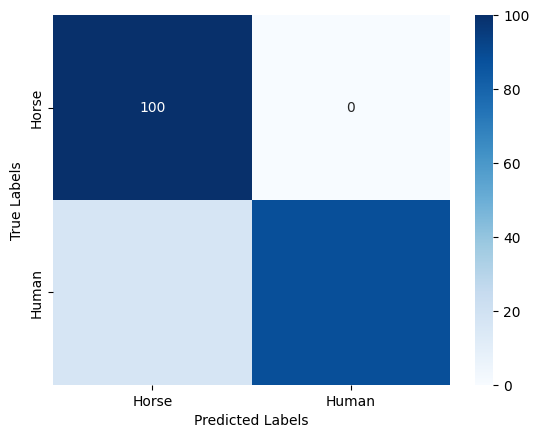

              precision    recall  f1-score   support

       Horse       0.85      1.00      0.92       100
       Human       1.00      0.84      0.91       105

    accuracy                           0.92       205
   macro avg       0.93      0.92      0.92       205
weighted avg       0.93      0.92      0.92       205



In [24]:
# Confusion matrix and classification report
predictions = (model.predict(test_generator) > 0.5).astype("int32")
true_labels = test_generator.classes
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Horse", "Human"], yticklabels=["Horse", "Human"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(classification_report(true_labels, predictions, target_names=["Horse", "Human"]))

Epoch 1/10
26/26 [==============================] - 22s 741ms/step - loss: 0.7251 - accuracy: 0.5255 - val_loss: 0.6932 - val_accuracy: 0.4878
Epoch 2/10
26/26 [==============================] - 19s 729ms/step - loss: 0.5707 - accuracy: 0.7275 - val_loss: 0.3404 - val_accuracy: 0.8976
Epoch 3/10
26/26 [==============================] - 20s 783ms/step - loss: 0.1812 - accuracy: 0.9270 - val_loss: 0.1036 - val_accuracy: 0.9463
Epoch 4/10
26/26 [==============================] - 20s 759ms/step - loss: 0.0764 - accuracy: 0.9696 - val_loss: 0.1484 - val_accuracy: 0.9512
Epoch 5/10
26/26 [==============================] - 19s 740ms/step - loss: 0.0614 - accuracy: 0.9781 - val_loss: 0.2271 - val_accuracy: 0.9122
Epoch 6/10
26/26 [==============================] - 19s 728ms/step - loss: 0.0734 - accuracy: 0.9781 - val_loss: 0.2943 - val_accuracy: 0.8439
Epoch 7/10
26/26 [==============================] - 19s 729ms/step - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.2148 - val_accuracy: 0.9317

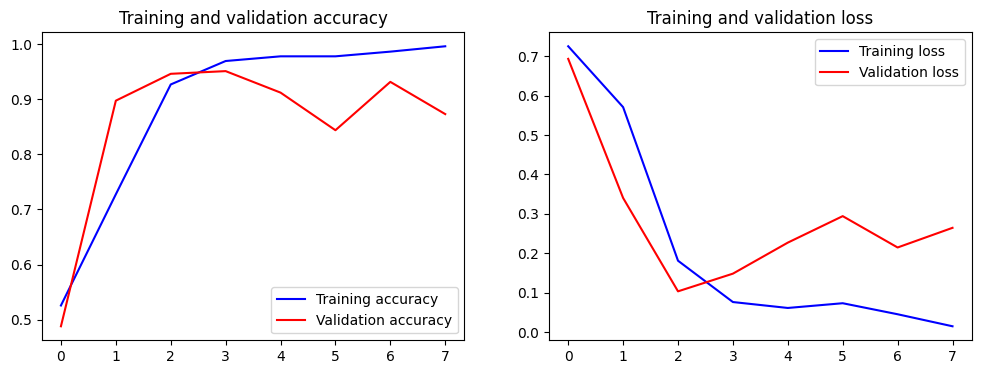

In [14]:
# Step 9: Techniques to prevent overfitting
# Adding Dropout layers
def build_model_with_dropout():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),  # Dropout layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),  # Dropout layer
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),  # Dropout layer
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model_with_dropout = build_model_with_dropout()
model_with_dropout.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

history_with_dropout = model_with_dropout.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

plot_history(history_with_dropout)